## Code for 1D Simulation of Exclusive Active Matter in the Hydrodynamic Limit 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba.experimental import jitclass
from numba import njit
import dim_one_sim  

In [59]:
N_x = 500
end_time = 100.0
epsilon=0.6
test_f = dim_one_sim.f(N_x=N_x, N_theta=50, v_0=15, L_x=20)
#test_f.set_gaussian(std_dev=0.4)
test_f.set_random(phi=0.8, delta=0.2)
test_f.evolve_to_time(t=end_time, recording_steps=1.0/200)
test_f.plot_history(y_breaks = 1, x_breaks=2)
plt.title(f't = {end_time}, $\epsilon=${epsilon}')
plt.show() 

<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_72824/4216179083.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.title(f't = {end_time}, $\epsilon=${epsilon}')


In [58]:
print(np.mean(test_f.history_rho[0]))

0.5994892485221366


[]

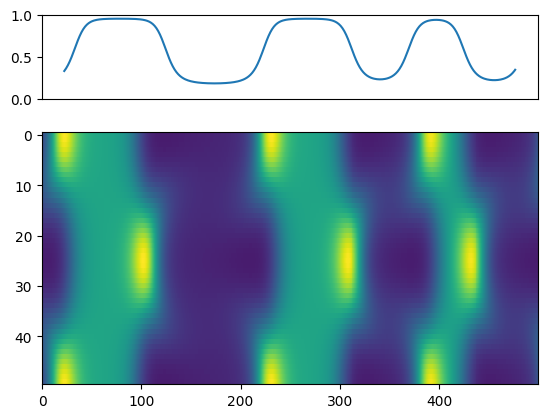

In [56]:
f = test_f.f
#if we want to normalize by local density
row_sums = f.sum(axis=1)
new_matrix = f / row_sums[:, np.newaxis]
fig, (ax1, ax2) = plt.subplots(2, height_ratios=(1,3))
ax2.imshow(f.T, aspect='auto', interpolation='none', vmin=0.0)
ax1.plot(test_f.history_rho[-1])
ax1.set_ylim(bottom=0.0, top=1.0)
ax1.set_xticks([])

In [27]:
print(min(test_f.history_rho[-1]))
print(max(test_f.history_rho[-1]))

0.1654717910548221
0.9514602678980469


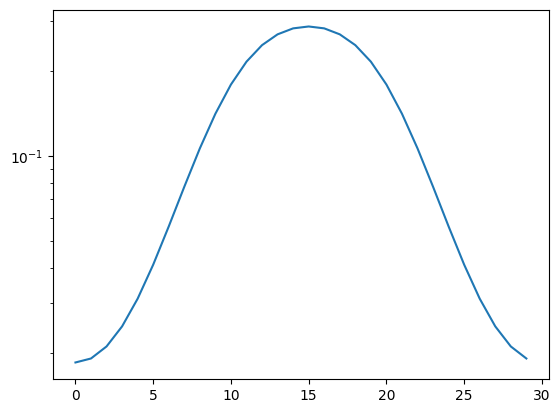

In [52]:
plt.plot(test_f.f[90, :])
#plt.plot([0.287*np.exp(-(x-0.04)**2/(0.25)) for x in np.linspace(-1, 1, 30)])
plt.yscale('log')

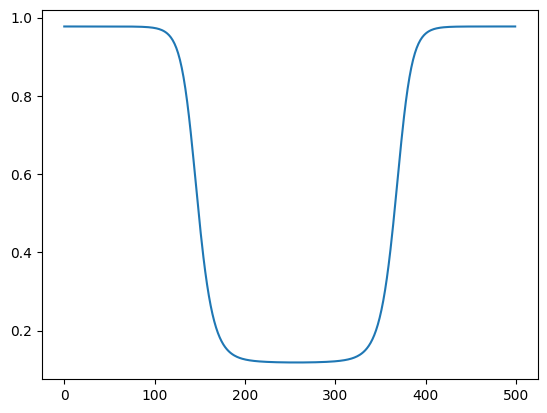

In [14]:
plt.plot(test_f.history_rho[-1])

In [6]:
print(min(test_f.history_rho[-1]))
print(max(test_f.history_rho[-1]))

0.11832462351271031
0.9771227629365974
